In [ ]:
# gh repo clone abudesai/timeVAE

# Import packages

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 5.9 MB/s eta 0:00:00


In [ ]:
pip install ml_collections

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ml_collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94506 sha256=a59640b9ee6f18986a1ad37df4499c71769b474a6eb941eb4cf2a2c2247a64df
  Stored in directory: /root/.cache/pip/wheels/7b/89/c9/a9b87790789e94aadcfc393c283e3ecd5ab916aed0a31be8fe
Successfully built ml_collections


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Projects/2. Generative deep finance/Market_Scenario_Generator_Hackathon_starting_kit

/content/drive/MyDrive/Projects/2. Generative deep finance/Market_Scenario_Generator_Hackathon_starting_kit


In [ ]:
# ! git clone https://github.com/DeepIntoStreams/Market_Scenario_Generator_Hackathon_starting_kit.git

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 500)
from scipy.stats import levy_stable

from datetime import datetime
from scipy.stats import kstest
from scipy.stats import jarque_bera
from arch.unitroot import ADF
from scipy.stats import kurtosis
from scipy.stats import skew
from arch import arch_model

from sklearn.metrics import mean_squared_error as mse

import pickle

import torch
import torch.nn as nn

import matplotlib.pyplot as plt
plt.style.use('classic')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)

# %config inlinebackend.figure_format = 'svg'

In [ ]:
import ml_collections
import copy
import yaml
from tqdm import tqdm
import os
import torch
import torch.nn as nn
from os import path as pt
import pickle
from torch.utils.data import DataLoader, TensorDataset
from src.baselines.base import BaseTrainer
from src.evaluation.summary import full_evaluation
from src.utils import get_experiment_dir, set_seed, init_weights, save_obj, load_obj
from src.evaluation.scores import compute_auc

In [ ]:
from IPython import display

import glob
import imageio
import PIL
import tensorflow_probability as tfp
import time

In [ ]:

computer = 'colab'

path = '/content/drive/MyDrive/Projects/2. Generative deep finance'

In [ ]:
import tensorflow as tf
import keras
from keras import layers

# Data

## Importing

In [ ]:
training_data = pd.read_pickle(f'{path}/Market_Scenario_Generator_Hackathon_starting_kit/data/ref_data.pkl')
training_label = pd.read_pickle(f'{path}/Market_Scenario_Generator_Hackathon_starting_kit/data/ref_label.pkl')

In [ ]:
training_data.shape, training_label.shape

((1199, 5, 10), (1199, 1))

In [ ]:
regular_market_data = training_data[(training_label==0).squeeze()]
crisis_market_data = training_data[(training_label==1).squeeze()]

In [ ]:
daily_log_return = training_data[:, :, [0, 2, 4, 6, 8]]
daily_vol = training_data[:, :, [1, 3, 5, 7, 9]]

daily_log_return_1 = training_data[:, 0, [0, 2, 4, 6, 8]]
daily_vol_1 = training_data[:, 0, [1, 3, 5, 7, 9]]

daily_log_return_2 = training_data[:, 1, [0, 2, 4, 6, 8]]
daily_vol_2 = training_data[:, 1, [1, 3, 5, 7, 9]]

daily_log_return_3 = training_data[:, 2, [0, 2, 4, 6, 8]]
daily_vol_3 = training_data[:, 2, [1, 3, 5, 7, 9]]

daily_log_return_4 = training_data[:, 3, [0, 2, 4, 6, 8]]
daily_vol_4 = training_data[:, 3, [1, 3, 5, 7, 9]]

daily_log_return_5 = training_data[:, 4, [0, 2, 4, 6, 8]]
daily_vol_5 = training_data[:, 4, [1, 3, 5, 7, 9]]


In [ ]:
daily_log_return.shape, daily_vol.shape

((1199, 5, 5), (1199, 5, 5))

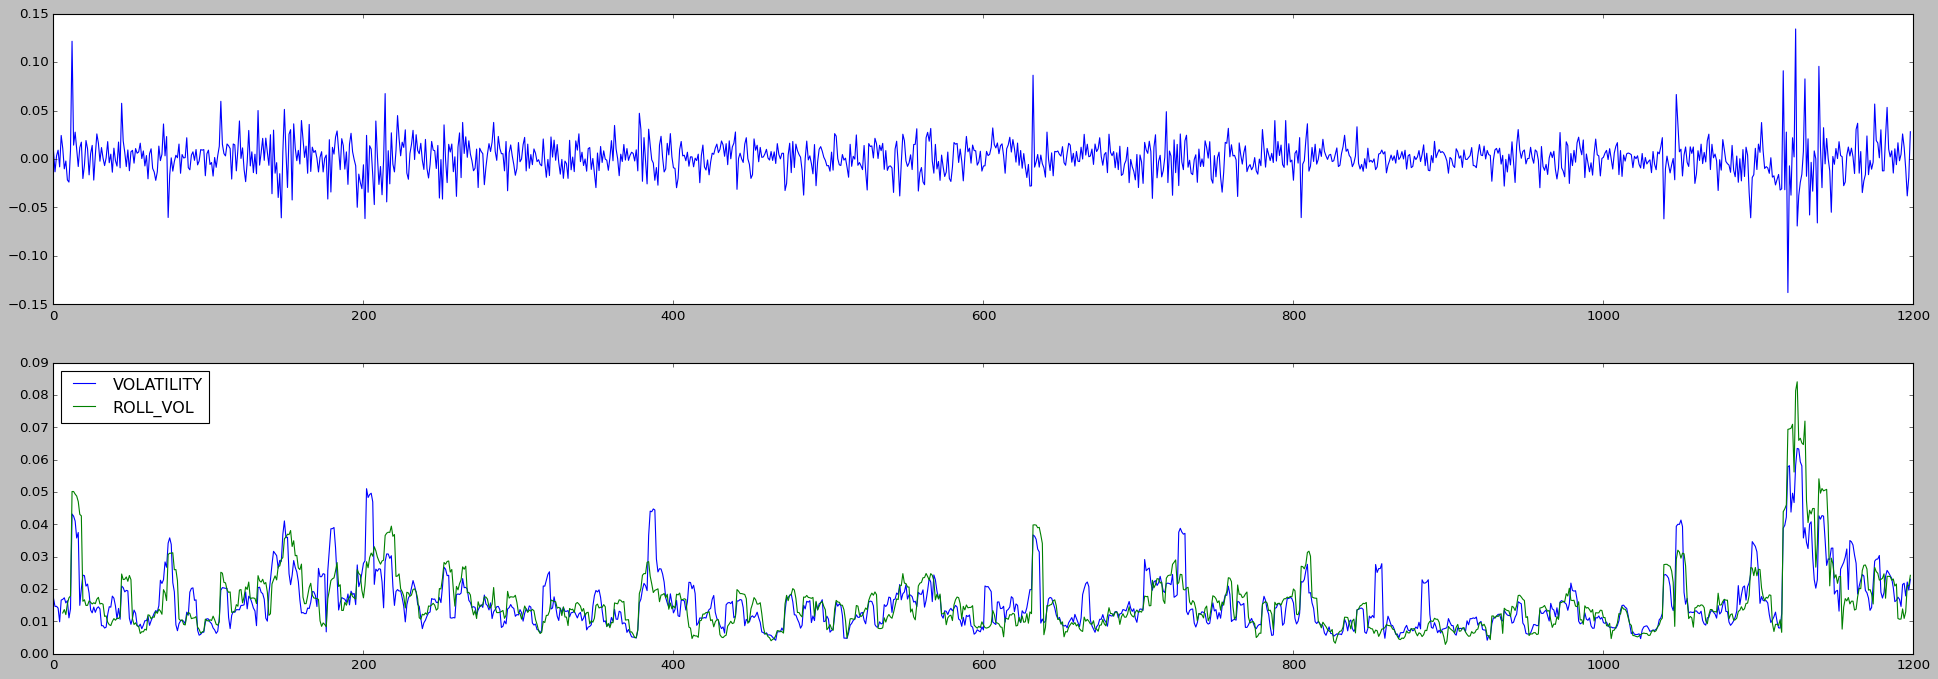

In [ ]:
ret = daily_log_return[:, 0, 0]
vol = daily_vol[:, 0, 0]

roll_vol = pd.Series(ret).rolling(window = 7).std()

res_model = arch_model(ret,
                       p = 1,
                       q = 1,
                       mean = 'Zero',
                       vol = 'GARCH',
                       dist = 'normal')

GARCH = res_model.fit(update_freq = 0,
                      disp = 'off')

GARCH_vol = GARCH.conditional_volatility

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (30, 10))

ax[0].plot(ret, label = f'RET', color = 'blue', linewidth = 1)

ax[1].plot(vol, label = f'VOLATILITY', color = 'blue', linewidth = 1)
ax[1].plot(roll_vol, label = f'ROLL_VOL', color = 'green', linewidth = 1)
# ax[1].plot(GARCH_vol, label = f'GARCH_VOL', color = 'red', linewidth = 1)
ax[1].legend(loc = 'upper left')

plt.show()

## Visualization

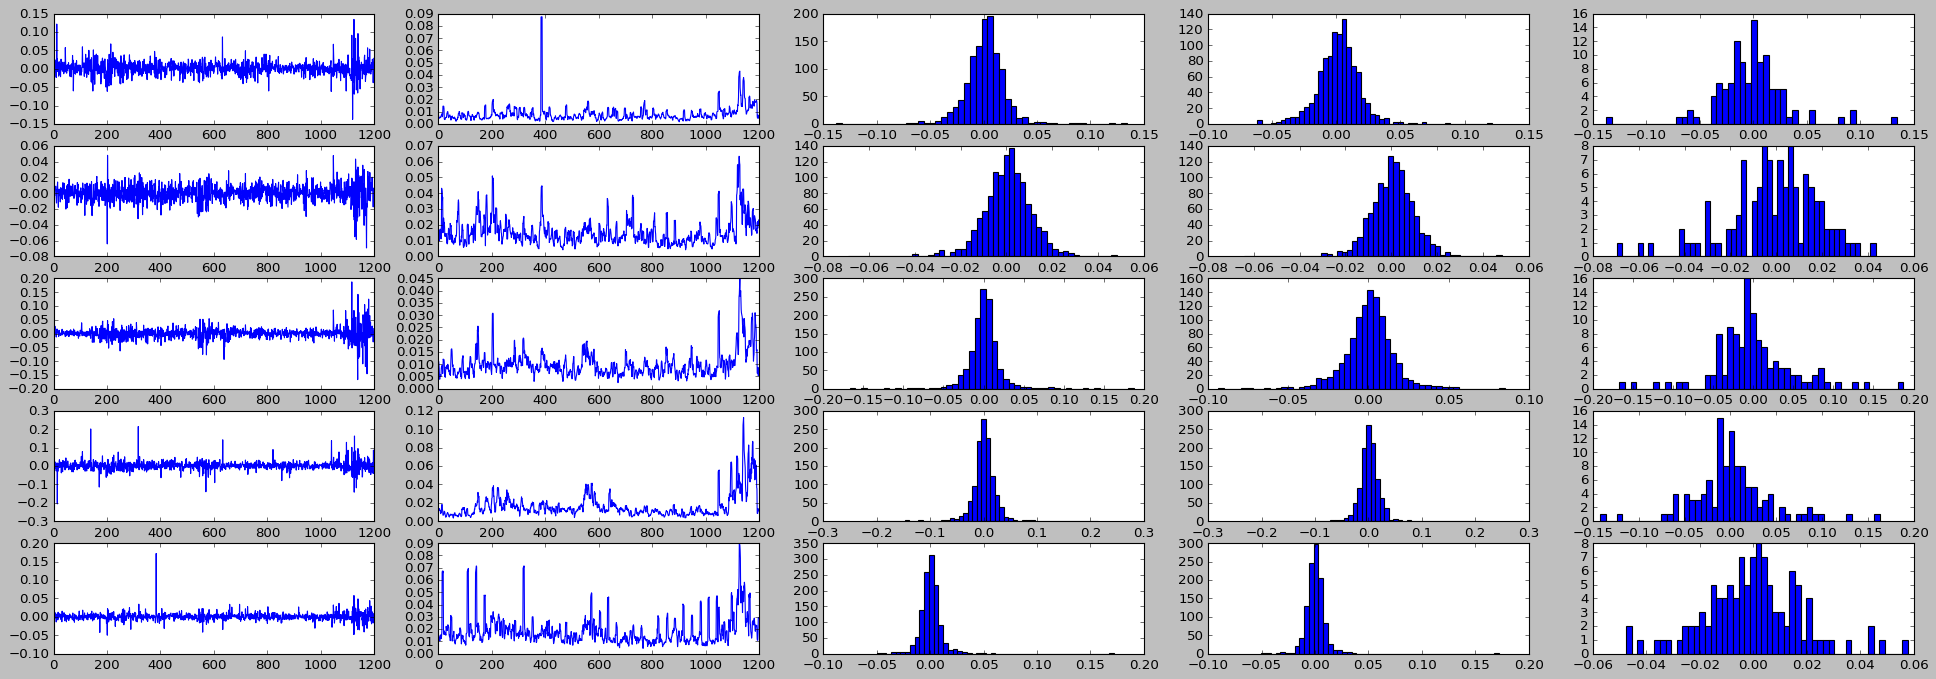

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize = (30, 10))

for i in range(5):
    ax[i, 0].plot(training_data[:, 0, 2*i], label = f'PRICE', color = 'blue', linewidth = 1)
    # ax[i, 0].legend(loc = 'upper right')

    ax[i, 1].plot(training_data[:, 0, 2*i - 1], label = f'VOLATILITY', color = 'blue', linewidth = 1)
    # ax[i, 1].legend(loc = 'upper right')

    ax[i, 2].hist(training_data[:, 0, 2*i], bins = 50)

    ax[i, 3].hist(regular_market_data[:, 0, 2*i], bins = 50)

    ax[i, 4].hist(crisis_market_data[:, 0, 2*i], bins = 50)

plt.show()

In [ ]:
regular_data = training_data[(training_label==0).squeeze()]
crisis_data = training_data[(training_label==1).squeeze()]

In [ ]:
regular_data.shape, crisis_data.shape

((1087, 5, 10), (112, 5, 10))

# Model class

## Conditional_VAE

### Define model

In [ ]:
from abc import ABC, abstractmethod

class Sampling(keras.layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


class C_VariationalAutoencoder(keras.Model, ABC):
    def __init__(self,
            seq_len,
            feat_dim,
            latent_dim,
            reconstruction_wt,
            **kwargs):
        super(C_VariationalAutoencoder, self).__init__(**kwargs)

        # number of points in one simulated result
        self.seq_len = seq_len

        # number of input features - may be just log daily return or in multivariate case, the number of assets, set to 1
        self.feat_dim = feat_dim

        # number of dimensions in the latent space, set to 1
        self.latent_dim = latent_dim

        self.reconstruction_wt = reconstruction_wt

        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")

        # mse distance between original and generated sample
        self.reconstruction_loss_tracker_1 = keras.metrics.Mean(name="reconstruction_loss_1")

        # probability distance between original and generated sample
        self.reconstruction_loss_tracker_2 = keras.metrics.Mean(name="reconstruction_loss_2")

        # probability distance between the latent space variable Z and the Gaussian distribution
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

        self.encoder = self._get_encoder()
        self.decoder = self._get_decoder()


    def call(self, X):
        X_cur, X_cond = X
        z_mean, _, _ = self.encoder(X_cur)
        x_decoded = self.decoder([z_mean, X_cond])
        if len(x_decoded.shape) == 1:
            x_decoded = x_decoded.reshape((1, -1))
        return x_decoded


    def _get_encoder(self):
        self.encoder_cur_inputs = keras.layers.Input(shape=(self.seq_len, self.feat_dim), name='encoder_curr_input')

        # masked_layer = keras.layers.Masking(mask_value=-1)(self.encoder_inputs)

        x = keras.layers.Flatten()(self.encoder_cur_inputs)
        x = keras.layers.Dense(100, activation = None, name = f'enc_dense_1')(x)

        z_mean = keras.layers.Dense(self.latent_dim, activation = None, name="z_mean")(x)
        z_log_var = keras.layers.Dense(self.latent_dim, activation = None, name="z_log_var")(x)

        encoder_output = Sampling()([z_mean, z_log_var])
        self.encoder_output = encoder_output

        encoder = keras.Model(self.encoder_cur_inputs, [z_mean, z_log_var, encoder_output], name="encoder")
        # encoder.summary()
        return encoder


    def _get_decoder(self):
        decoder_rand_inputs = keras.layers.Input(shape=(self.latent_dim), name='decoder_random')
        decoder_cond_inputs = keras.layers.Input(shape=(1,), name='decoder_cond_input')

        x1 = tf.keras.layers.RepeatVector(100)(decoder_cond_inputs)
        x1 = keras.layers.Flatten()(x1)

        x = keras.layers.concatenate([decoder_rand_inputs, x1])

        x = keras.layers.Dense(100,
                               activation = None,
                               name='decoder_dense',
                               kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                               bias_initializer=keras.initializers.Zeros())(x)

        # Asset 1
        ret_1 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_1',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_1 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_1)

        vol_1 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_1',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_1 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_1)

        # Asset 2
        ret_2 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_2',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_2 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_2)

        vol_2 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_2',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_2 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_2)

        # Asset 3
        ret_3 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_3',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_3 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_3)

        vol_3 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_3',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_3 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_3)

        # Asset 4
        ret_4 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_4',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_4 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_4)

        vol_4 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_4',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_4 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_4)

        # Asset 5
        ret_5 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_5',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_5 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_5)

        vol_5 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_5',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_5 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_5)

        # Concat
        self.decoder_outputs = keras.layers.concatenate([ret_1, vol_1, ret_2, vol_2, ret_3, vol_3, ret_4, vol_4, ret_5, vol_5,])

        decoder = keras.Model([decoder_rand_inputs, decoder_cond_inputs], self.decoder_outputs, name="decoder")
        # decoder.summary()
        return decoder


    def _get_reconstruction_loss(self, X, X_recons):

        def get_reconst_loss_by_axis(X, X_c, axis):
            x_r = tf.reduce_mean(X, axis = axis)
            x_c_r = tf.reduce_mean(X_recons, axis = axis)
            err = tf.math.squared_difference(x_r, x_c_r)
            loss = tf.reduce_sum(err)
            return loss

        # overall
        err = tf.math.squared_difference(X, X_recons)
        reconst_loss = tf.reduce_sum(err)

        reconst_loss += get_reconst_loss_by_axis(X, X_recons, axis=1)
        reconst_loss += get_reconst_loss_by_axis(X, X_recons, axis=2)

        return reconst_loss


    def summary(self):
        self.encoder.summary()
        self.decoder.summary()


    def train_step(self, X):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(X[0])
            reconstruction = self.decoder([z, X[1]])

            # adjusted MSE
            reconstruction_loss_1 = self._get_reconstruction_loss(tf.cast(X[0], tf.float64), tf.cast(reconstruction, tf.float64))

            reconstruction_loss_2 = 0

            pred_ret_1 = tf.cast(reconstruction[:, :, 0], tf.float64)
            pred_vol_1 = tf.cast(reconstruction[:, :, 1], tf.float64)

            pred_ret_2 = tf.cast(reconstruction[:, :, 2], tf.float64)
            pred_vol_2 = tf.cast(reconstruction[:, :, 3], tf.float64)

            pred_ret_3 = tf.cast(reconstruction[:, :, 4], tf.float64)
            pred_vol_3 = tf.cast(reconstruction[:, :, 5], tf.float64)

            pred_ret_4 = tf.cast(reconstruction[:, :, 6], tf.float64)
            pred_vol_4 = tf.cast(reconstruction[:, :, 7], tf.float64)

            pred_ret_5 = tf.cast(reconstruction[:, :, 8], tf.float64)
            pred_vol_5 = tf.cast(reconstruction[:, :, 9], tf.float64)

            # True
            true_ret_1 = tf.cast(X[0][:, :, 0], tf.float64)
            true_vol_1 = tf.cast(X[0][:, :, 1], tf.float64)

            true_ret_2 = tf.cast(X[0][:, :, 2], tf.float64)
            true_vol_2 = tf.cast(X[0][:, :, 3], tf.float64)

            true_ret_3 = tf.cast(X[0][:, :, 4], tf.float64)
            true_vol_3 = tf.cast(X[0][:, :, 5], tf.float64)

            true_ret_4 = tf.cast(X[0][:, :, 6], tf.float64)
            true_vol_4 = tf.cast(X[0][:, :, 7], tf.float64)

            true_ret_5 = tf.cast(X[0][:, :, 8], tf.float64)
            true_vol_5 = tf.cast(X[0][:, :, 9], tf.float64)

            # PSI
            # reconstruction_loss = tf.reduce_sum(
            #         keras.losses.kl_divergence(X, reconstruction)
            #         + keras.losses.kl_divergence(reconstruction, X)
            #         + keras.losses.mean_absolute_error(X, reconstruction)
            #         + keras.losses.mse(X, reconstruction)
            #        )

            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_sum(kl_loss, axis=1)

            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_1, pred_ret_1)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_2, pred_ret_2)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_3, pred_ret_3)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_4, pred_ret_4)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_5, pred_ret_5)

            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_1, pred_vol_1)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_2, pred_vol_2)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_3, pred_vol_3)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_4, pred_vol_4)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_5, pred_vol_5)


            true_corr = tfp.stats.correlation(X[0], sample_axis = 0, event_axis = -1)
            pred_corr = tfp.stats.correlation(reconstruction, sample_axis = 0, event_axis = -1)

            reconstruction_loss_2 += tf.reduce_mean(tf.math.squared_difference(tf.cast(true_corr, tf.float64),
                                                                               tf.cast(pred_corr, tf.float64)))

            total_loss = tf.cast(self.reconstruction_wt * reconstruction_loss_1, tf.float64) \
                            + tf.cast(reconstruction_loss_2, tf.float64) \
                            + tf.cast(kl_loss, tf.float64)


        grads = tape.gradient(total_loss, self.trainable_weights)

        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker_1.update_state(reconstruction_loss_1)
        self.reconstruction_loss_tracker_2.update_state(reconstruction_loss_2)

        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss_1": self.reconstruction_loss_tracker_1.result(),
            "reconstruction_loss_2": self.reconstruction_loss_tracker_2.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

### Train model

In [ ]:

vae = C_VariationalAutoencoder(
    seq_len=5,
    feat_dim = 10,
    latent_dim = 5,
    reconstruction_wt = 3
)

vae.compile(optimizer=keras.optimizers.Adam(1e-4))


In [ ]:
vae.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_curr_input (InputL  [(None, 5, 10)]              0         []                            
 ayer)                                                                                            
                                                                                                  
 flatten_12 (Flatten)        (None, 50)                   0         ['encoder_curr_input[0][0]']  
                                                                                                  
 enc_dense_1 (Dense)         (None, 100)                  5100      ['flatten_12[0][0]']          
                                                                                                  
 z_mean (Dense)              (None, 5)                    505       ['enc_dense_1[0][0]']   

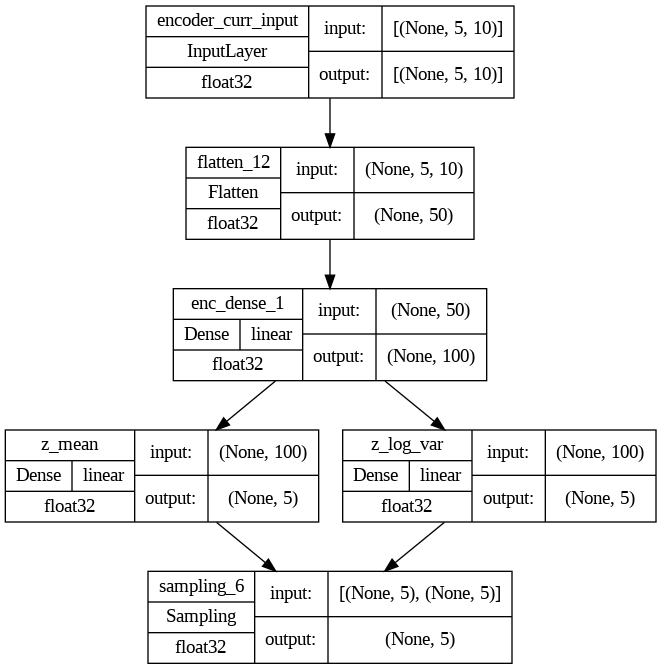

In [ ]:
tf.keras.utils.plot_model(vae.encoder,
                          #to_file = f'{path}/Data/Structure.png',
                          dpi = 96,
                          show_shapes = True,
                          show_dtype = True,
                          show_layer_names = True,
                          show_layer_activations = True,
                          expand_nested=False,
                          show_trainable=False)

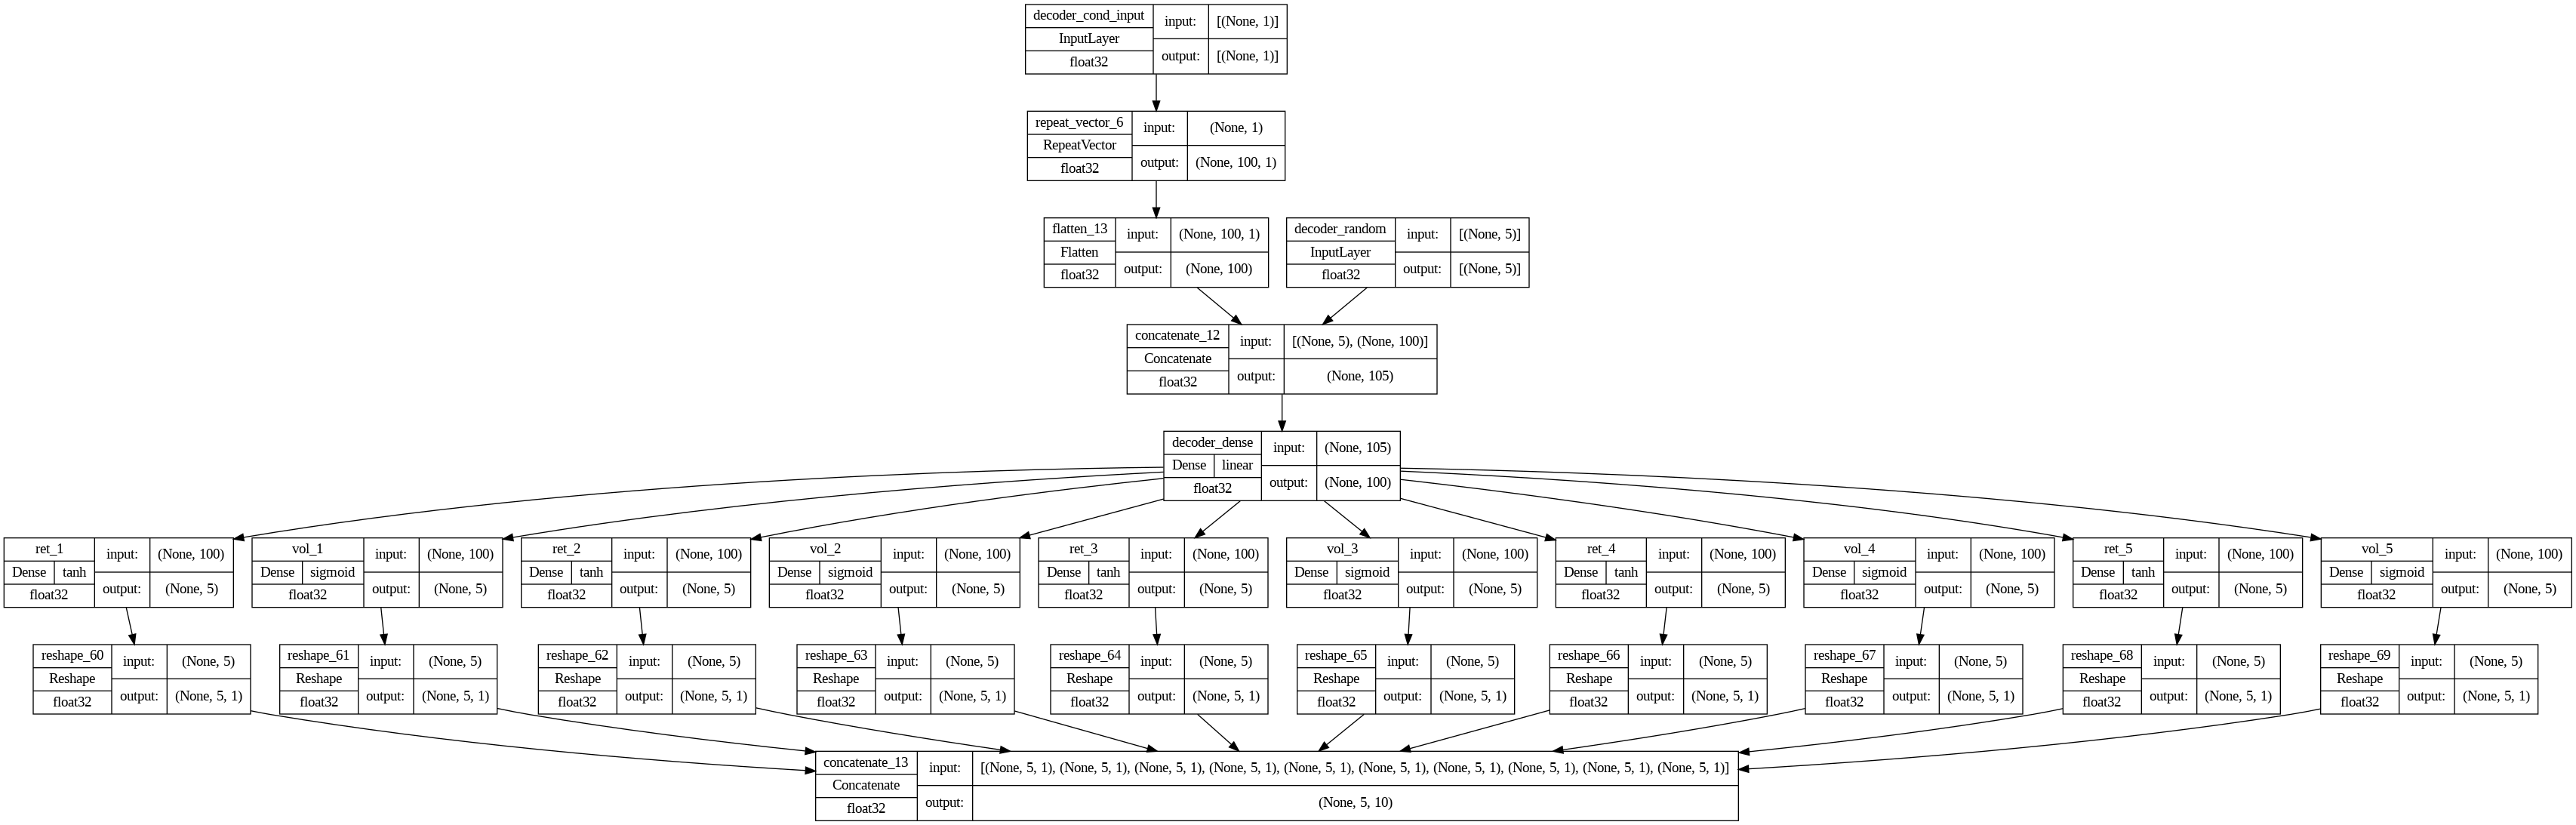

In [ ]:
tf.keras.utils.plot_model(vae.decoder,
                          #to_file = f'{path}/Data/Structure.png',
                          dpi = 96,
                          show_shapes = True,
                          show_dtype = True,
                          show_layer_names = True,
                          show_layer_activations = True,
                          expand_nested=False,
                          show_trainable=False)

In [ ]:
input_set = tf.data.Dataset.from_tensor_slices((training_data, training_label))
input_set = input_set.batch(32)
dataset = tf.data.Dataset.zip((input_set))
# Initialize the iterator to be passed to the model.fit() function
# data_iter = dataset.make_one_shot_iterator()

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=50)

history = vae.fit(dataset, epochs = 100, batch_size = 32, shuffle = True, verbose = True,
                  callbacks=[callback]
                  )

Epoch 1/100
38/38 [==============================] - 8s 6ms/step - loss: 710.7590 - reconstruction_loss_1: 232.6594 - reconstruction_loss_2: 0.1000 - kl_loss: 0.0030
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 706.6799 - reconstruction_loss_1: 230.3310 - reconstruction_loss_2: -0.0375 - kl_loss: 0.0087
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 701.2369 - reconstruction_loss_1: 226.3794 - reconstruction_loss_2: -0.0063 - kl_loss: 0.0245
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 693.0352 - reconstruction_loss_1: 220.2655 - reconstruction_loss_2: -0.0121 - kl_loss: 0.0621
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 680.0549 - reconstruction_loss_1: 212.0294 - reconstruction_loss_2: -0.0459 - kl_loss: 0.1464
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 660.0300 - reconstruction_loss_1: 201.4538 - reconstruction_loss_2: -0.0259 - kl_loss: 0.3134

### Evaluation

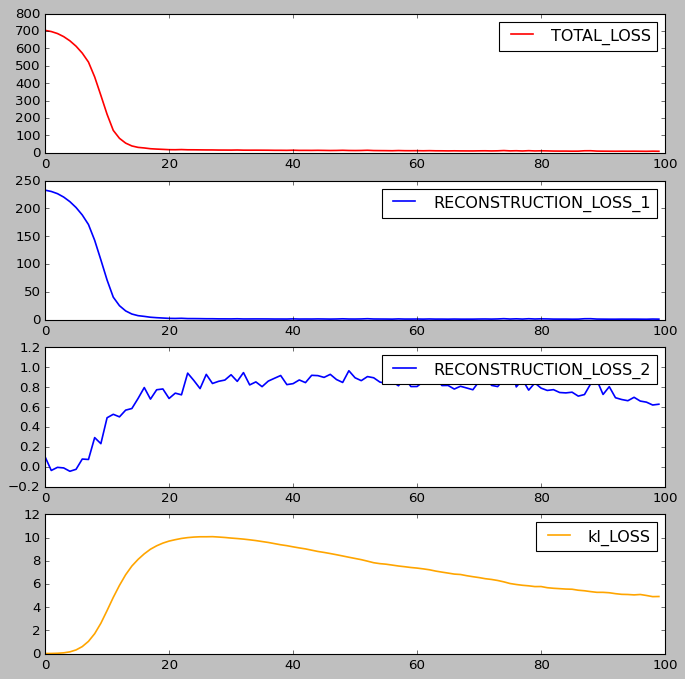

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10, 10))

ax[0].plot(history.history['loss'], label = f'TOTAL_LOSS', color = 'red', linewidth = 1.5)
ax[0].legend(loc = 'upper right')

ax[1].plot(history.history['reconstruction_loss_1'], label = f'RECONSTRUCTION_LOSS_1', color = 'blue', linewidth = 1.5)
ax[1].legend(loc = 'upper right')

ax[2].plot(history.history['reconstruction_loss_2'], label = f'RECONSTRUCTION_LOSS_2', color = 'blue', linewidth = 1.5)
ax[2].legend(loc = 'upper right')

ax[3].plot(history.history['kl_loss'], label = f'kl_LOSS', color = 'orange', linewidth = 1.5)
ax[3].legend(loc = 'upper right')

plt.show()

In [ ]:
random_fac = tf.random.normal(shape = (200, 5))
# random_fac

In [ ]:
regular_conditions = tf.ones(shape = (200, 1))
crisis_conditions = tf.zeros(shape = (200, 1))

In [ ]:
# y_regular_pred = vae.decoder.predict([tf.random.normal(shape = (220, 10)), regular_seed])
# y_crisis_pred = vae.decoder.predict([tf.random.normal(shape = (20, 10)), crisis_seed])

regular_fake_data = vae.decoder.predict([random_fac, regular_conditions])
crisis_fake_data = vae.decoder.predict([random_fac, crisis_conditions])


7/7 [==============================] - 0s 4ms/step


In [ ]:
regular_fake_data.shape, crisis_fake_data.shape

((200, 5, 10), (200, 5, 10))

In [ ]:
regular_data = torch.tensor(regular_data)
crisis_data = torch.tensor(crisis_data)

regular_fake_data = torch.tensor(regular_fake_data)
crisis_fake_data = torch.tensor(crisis_fake_data)

In [ ]:
config_dir = 'src/evaluation/config.yaml'
with open(config_dir) as file:
    eval_config = ml_collections.ConfigDict(yaml.safe_load(file))


In [ ]:
eval_config.device = 'cpu'
eval_config.n_eval = 100

In [ ]:

res_dict_regular = full_evaluation(regular_fake_data, regular_data, eval_config)
# for k, v in res_dict_regular.items():
#     print(k, v)

res_dict_crisis = full_evaluation(crisis_fake_data, crisis_data, eval_config)
# for k, v in res_dict_regular.items():
#     print(k, v)

---- evaluation metric = hist_loss in group = stylized_fact_scores ----


100%|██████████| 5/5 [00:00<00:00, 19.06it/s]


---- evaluation metric = acf_loss in group = stylized_fact_scores ----


100%|██████████| 5/5 [00:00<00:00, 26.43it/s]


---- evaluation metric = cov_loss in group = stylized_fact_scores ----


100%|██████████| 5/5 [00:00<00:00, 20.43it/s]


---- evaluation metric = cross_corr in group = stylized_fact_scores ----


100%|██████████| 5/5 [00:00<00:00, 14.05it/s]


 No metrics enabled in group = implicit_scores
 No metrics enabled in group = sig_scores
 No metrics enabled in group = permutation_test
 No metrics enabled in group = distance_based_metrics
---- evaluation metric = var in group = tail_scores ----


100%|██████████| 5/5 [00:00<00:00, 25.26it/s]


---- evaluation metric = es in group = tail_scores ----


100%|██████████| 5/5 [00:00<00:00, 26.40it/s]


---- evaluation metric = hist_loss in group = stylized_fact_scores ----


100%|██████████| 5/5 [00:00<00:00, 35.99it/s]


---- evaluation metric = acf_loss in group = stylized_fact_scores ----


100%|██████████| 5/5 [00:00<00:00, 72.56it/s]


---- evaluation metric = cov_loss in group = stylized_fact_scores ----


100%|██████████| 5/5 [00:00<00:00, 68.15it/s]


---- evaluation metric = cross_corr in group = stylized_fact_scores ----


100%|██████████| 5/5 [00:00<00:00, 37.23it/s]


 No metrics enabled in group = implicit_scores
 No metrics enabled in group = sig_scores
 No metrics enabled in group = permutation_test
 No metrics enabled in group = distance_based_metrics
---- evaluation metric = var in group = tail_scores ----


100%|██████████| 5/5 [00:00<00:00, 82.57it/s]


---- evaluation metric = es in group = tail_scores ----


100%|██████████| 5/5 [00:00<00:00, 63.26it/s]


In [ ]:
res_dict_regular, res_dict_crisis

({'hist_loss_mean': 14.956958,
  'hist_loss_std': 0.25835133,
  'acf_loss_mean': 0.33238482,
  'acf_loss_std': 0.007974936,
  'cov_loss_mean': 0.00933435,
  'cov_loss_std': 0.0013409551,
  'cross_corr_mean': 9.661531,
  'cross_corr_std': 0.3979541,
  'var_mean': 0.01315147,
  'var_std': 0.0027658867,
  'es_mean': 0.00817615,
  'es_std': 0.0005181822},
 {'hist_loss_mean': 13.6239195,
  'hist_loss_std': 0.21801364,
  'acf_loss_mean': 0.32718596,
  'acf_loss_std': 0.0133528,
  'cov_loss_mean': 0.014042789,
  'cov_loss_std': 0.0004006833,
  'cross_corr_mean': 9.004567,
  'cross_corr_std': 0.23842964,
  'var_mean': 0.029329354,
  'var_std': 0.01567509,
  'es_mean': 0.013231206,
  'es_std': 0.0031236492})

In [ ]:
df_result = pd.DataFrame.from_dict(res_dict_regular, orient='index')
df_result.columns = ['Regular']
df_result['Crisis'] = res_dict_crisis
df_result['Score'] = 0.7*df_result['Crisis'] + 0.3*df_result['Regular']

In [ ]:
df_result.round(5)

,Regular,Crisis,Score
hist_loss_mean,14.95696,13.62392,14.02383
hist_loss_std,0.25835,0.21801,0.23011
acf_loss_mean,0.33238,0.32719,0.32875
acf_loss_std,0.00797,0.01335,0.01174
cov_loss_mean,0.00933,0.01404,0.01263
cov_loss_std,0.00134,0.00040,0.00068
cross_corr_mean,9.66153,9.00457,9.20166
cross_corr_std,0.39795,0.23843,0.28629
var_mean,0.01315,0.02933,0.02448
var_std,0.00277,0.01568,0.01180


In [ ]:
auc = compute_auc(crisis_data, crisis_fake_data, regular_data, regular_fake_data, eval_config)
print(auc)

0.7727678571428571


### Submission

In [ ]:
vae.decoder.save_weights('./sample_submission_bundle/model_dict')

In [ ]:
save_obj(regular_fake_data.cpu().numpy(), './sample_submission_bundle/fake_regular.pkl')
save_obj(crisis_fake_data.cpu().numpy(), './sample_submission_bundle/fake_crisis.pkl')

0

In [ ]:
"""
This is a sample file. Any user must provide a python function named init_generator() which:
    - initializes an instance of the generator,
    - loads the model parameters from model_dict.py,
    - returns the model.
"""
import numpy as np
import os
import pickle
import torch
import torch.nn as nn

PATH_TO_MODEL = './sample_submission_bundle/model_dict'
PATH_TO_DATA = './sample_submission_bundle/fake_data.pkl'

from abc import ABC, abstractmethod

class Sampling(keras.layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


class C_VariationalAutoencoder(keras.Model, ABC):
    def __init__(self,
            seq_len,
            feat_dim,
            latent_dim,
            reconstruction_wt,
            **kwargs):
        super(C_VariationalAutoencoder, self).__init__(**kwargs)

        # number of points in one simulated result
        self.seq_len = seq_len

        # number of input features - may be just log daily return or in multivariate case, the number of assets, set to 1
        self.feat_dim = feat_dim

        # number of dimensions in the latent space, set to 1
        self.latent_dim = latent_dim

        self.reconstruction_wt = reconstruction_wt

        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")

        # mse distance between original and generated sample
        self.reconstruction_loss_tracker_1 = keras.metrics.Mean(name="reconstruction_loss_1")

        # probability distance between original and generated sample
        self.reconstruction_loss_tracker_2 = keras.metrics.Mean(name="reconstruction_loss_2")

        # probability distance between the latent space variable Z and the Gaussian distribution
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

        self.encoder = self._get_encoder()
        self.decoder = self._get_decoder()


    def call(self, X):
        X_cur, X_cond = X
        z_mean, _, _ = self.encoder(X_cur)
        x_decoded = self.decoder([z_mean, X_cond])
        if len(x_decoded.shape) == 1:
            x_decoded = x_decoded.reshape((1, -1))
        return x_decoded


    def _get_encoder(self):
        self.encoder_cur_inputs = keras.layers.Input(shape=(self.seq_len, self.feat_dim), name='encoder_curr_input')

        # masked_layer = keras.layers.Masking(mask_value=-1)(self.encoder_inputs)

        x = keras.layers.Flatten()(self.encoder_cur_inputs)
        x = keras.layers.Dense(100, activation = None, name = f'enc_dense_1')(x)

        z_mean = keras.layers.Dense(self.latent_dim, activation = None, name="z_mean")(x)
        z_log_var = keras.layers.Dense(self.latent_dim, activation = None, name="z_log_var")(x)

        encoder_output = Sampling()([z_mean, z_log_var])
        self.encoder_output = encoder_output

        encoder = keras.Model(self.encoder_cur_inputs, [z_mean, z_log_var, encoder_output], name="encoder")
        # encoder.summary()
        return encoder


    def _get_decoder(self):
        decoder_rand_inputs = keras.layers.Input(shape=(self.latent_dim), name='decoder_random')
        decoder_cond_inputs = keras.layers.Input(shape=(1,), name='decoder_cond_input')

        x1 = tf.keras.layers.RepeatVector(100)(decoder_cond_inputs)
        x1 = keras.layers.Flatten()(x1)

        x = keras.layers.concatenate([decoder_rand_inputs, x1])

        x = keras.layers.Dense(100,
                               activation = None,
                               name='decoder_dense',
                               kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                               bias_initializer=keras.initializers.Zeros())(x)

        # Asset 1
        ret_1 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_1',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_1 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_1)

        vol_1 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_1',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_1 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_1)

        # Asset 2
        ret_2 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_2',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_2 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_2)

        vol_2 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_2',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_2 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_2)

        # Asset 3
        ret_3 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_3',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_3 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_3)

        vol_3 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_3',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_3 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_3)

        # Asset 4
        ret_4 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_4',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_4 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_4)

        vol_4 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_4',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_4 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_4)

        # Asset 5
        ret_5 = keras.layers.Dense(5,
                                   activation = 'tanh',
                                   name='ret_5',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        ret_5 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(ret_5)

        vol_5 = keras.layers.Dense(5,
                                   activation = 'sigmoid',
                                   name='vol_5',
                                   kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
                                   bias_initializer=keras.initializers.Zeros())(x)
        vol_5 = keras.layers.Reshape(target_shape=(self.seq_len, 1))(vol_5)

        # Concat
        self.decoder_outputs = keras.layers.concatenate([ret_1, vol_1, ret_2, vol_2, ret_3, vol_3, ret_4, vol_4, ret_5, vol_5,])

        decoder = keras.Model([decoder_rand_inputs, decoder_cond_inputs], self.decoder_outputs, name="decoder")
        # decoder.summary()
        return decoder


    def _get_reconstruction_loss(self, X, X_recons):

        def get_reconst_loss_by_axis(X, X_c, axis):
            x_r = tf.reduce_mean(X, axis = axis)
            x_c_r = tf.reduce_mean(X_recons, axis = axis)
            err = tf.math.squared_difference(x_r, x_c_r)
            loss = tf.reduce_sum(err)
            return loss

        # overall
        err = tf.math.squared_difference(X, X_recons)
        reconst_loss = tf.reduce_sum(err)

        reconst_loss += get_reconst_loss_by_axis(X, X_recons, axis=1)
        reconst_loss += get_reconst_loss_by_axis(X, X_recons, axis=2)

        return reconst_loss


    def summary(self):
        self.encoder.summary()
        self.decoder.summary()


    def train_step(self, X):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(X[0])
            reconstruction = self.decoder([z, X[1]])

            # adjusted MSE
            reconstruction_loss_1 = self._get_reconstruction_loss(tf.cast(X[0], tf.float64), tf.cast(reconstruction, tf.float64))

            reconstruction_loss_2 = 0

            pred_ret_1 = tf.cast(reconstruction[:, :, 0], tf.float64)
            pred_vol_1 = tf.cast(reconstruction[:, :, 1], tf.float64)

            pred_ret_2 = tf.cast(reconstruction[:, :, 2], tf.float64)
            pred_vol_2 = tf.cast(reconstruction[:, :, 3], tf.float64)

            pred_ret_3 = tf.cast(reconstruction[:, :, 4], tf.float64)
            pred_vol_3 = tf.cast(reconstruction[:, :, 5], tf.float64)

            pred_ret_4 = tf.cast(reconstruction[:, :, 6], tf.float64)
            pred_vol_4 = tf.cast(reconstruction[:, :, 7], tf.float64)

            pred_ret_5 = tf.cast(reconstruction[:, :, 8], tf.float64)
            pred_vol_5 = tf.cast(reconstruction[:, :, 9], tf.float64)

            # True
            true_ret_1 = tf.cast(X[0][:, :, 0], tf.float64)
            true_vol_1 = tf.cast(X[0][:, :, 1], tf.float64)

            true_ret_2 = tf.cast(X[0][:, :, 2], tf.float64)
            true_vol_2 = tf.cast(X[0][:, :, 3], tf.float64)

            true_ret_3 = tf.cast(X[0][:, :, 4], tf.float64)
            true_vol_3 = tf.cast(X[0][:, :, 5], tf.float64)

            true_ret_4 = tf.cast(X[0][:, :, 6], tf.float64)
            true_vol_4 = tf.cast(X[0][:, :, 7], tf.float64)

            true_ret_5 = tf.cast(X[0][:, :, 8], tf.float64)
            true_vol_5 = tf.cast(X[0][:, :, 9], tf.float64)

            # PSI
            # reconstruction_loss = tf.reduce_sum(
            #         keras.losses.kl_divergence(X, reconstruction)
            #         + keras.losses.kl_divergence(reconstruction, X)
            #         + keras.losses.mean_absolute_error(X, reconstruction)
            #         + keras.losses.mse(X, reconstruction)
            #        )

            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_sum(kl_loss, axis=1)

            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_1, pred_ret_1)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_2, pred_ret_2)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_3, pred_ret_3)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_4, pred_ret_4)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_ret_5, pred_ret_5)

            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_1, pred_vol_1)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_2, pred_vol_2)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_3, pred_vol_3)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_4, pred_vol_4)
            reconstruction_loss_2 += tf.keras.losses.KLDivergence()(true_vol_5, pred_vol_5)


            true_corr = tfp.stats.correlation(X[0], sample_axis = 0, event_axis = -1)
            pred_corr = tfp.stats.correlation(reconstruction, sample_axis = 0, event_axis = -1)

            reconstruction_loss_2 += tf.reduce_mean(tf.math.squared_difference(tf.cast(true_corr, tf.float64),
                                                                               tf.cast(pred_corr, tf.float64)))

            total_loss = tf.cast(self.reconstruction_wt * reconstruction_loss_1, tf.float64) \
                            + tf.cast(reconstruction_loss_2, tf.float64) \
                            + tf.cast(kl_loss, tf.float64)


        grads = tape.gradient(total_loss, self.trainable_weights)

        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker_1.update_state(reconstruction_loss_1)
        self.reconstruction_loss_tracker_2.update_state(reconstruction_loss_2)

        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss_1": self.reconstruction_loss_tracker_1.result(),
            "reconstruction_loss_2": self.reconstruction_loss_tracker_2.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

def init_generator():
    print("Initialisation of the model.")
    config = {
        "seq_len": 5,
        "feat_dim": 10,
        "latent_dim": 5,
        "reconstruction_wt": 3,
    }

    vae = C_VariationalAutoencoder(
        seq_len=config['seq_len'],
        feat_dim = config['feat_dim'],
        latent_dim = config['latent_dim'],
        reconstruction_wt = config['reconstruction_wt']
    )

    # vae.summary()
    print("Loading the model.")
    vae.decoder.load_weights(PATH_TO_MODEL)
    return vae.decoder


if __name__ == '__main__':
    generator = init_generator()
    print("Generator loaded. Generate fake data.")

    random_fac = tf.random.normal(shape = (200, 5))
    regular_conditions = tf.ones(shape = (200, 1))

    fake_regular_data = vae.decoder.predict([random_fac, regular_conditions])
    fake_regular_data = torch.tensor(fake_regular_data)
    print(fake_regular_data[0, 0:10, :])

    with open(PATH_TO_DATA, 'wb') as file:
        # A new file will be created
        pickle.dump(fake_regular_data, file)

Initialisation of the model.
Loading the model.
Generator loaded. Generate fake data.
7/7 [==============================] - 0s 2ms/step
tensor([[ 0.0056,  0.5041,  0.0027,  0.4973,  0.0059,  0.5072,  0.0070,  0.5037,
          0.0068,  0.4966],
        [ 0.0067,  0.5029,  0.0032,  0.4944,  0.0047,  0.5057, -0.0026,  0.4936,
         -0.0166,  0.4996],
        [ 0.0132,  0.5042,  0.0106,  0.4952,  0.0116,  0.5031,  0.0143,  0.5009,
          0.0121,  0.5006],
        [ 0.0075,  0.5038,  0.0115,  0.5000,  0.0139,  0.4966,  0.0046,  0.4981,
          0.0084,  0.4973],
        [ 0.0100,  0.5021,  0.0033,  0.4861,  0.0101,  0.5052,  0.0109,  0.5045,
          0.0023,  0.4983]])
